In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data saved in Oct 2021

We load a table saved in October 2021. The table has correct information (as of Fall 2021) about whether the student is in Greek life, is in a sports team, academic career, and classes they registered for. The columns `student_infected` and `hd_notify_date` should be ignored.

In [2]:
class_registrations = pd.read_csv('older data/TAB_all_students_classes.csv')
print(class_registrations.shape)
class_registrations.head()

(143873, 12)


,employee_id_hash,is_greek,is_athlete,academic_career,academic_plan1,subject,catalog_nbr,class_number,class_enroll_tot,class_section,student_infected,hd_notify_date
0,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG,ESAG-BS,PLSCS,2200.0,2885.0,23.0,401,0,NaN
1,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG,ESAG-BS,BIOEE,4620.0,17542.0,36.0,1,0,NaN
2,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG,ESAG-BS,MATH,2210.0,4310.0,58.0,1,0,NaN
3,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG,ESAG-BS,PLSCS,2200.0,2884.0,44.0,1,0,NaN
4,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG,ESAG-BS,QUECH,1210.0,18873.0,11.0,101,0,NaN


Exploratory analysis:
- Dataset description
- Distribution of number of classes a student is registered for, possibly broken down by academic career


In [3]:
# get the distinct set of students in the data 
class_registrations_students = class_registrations[['employee_id_hash', 'is_greek', 'is_athlete', 'academic_career']]
class_registrations_students.drop_duplicates(inplace=True, ignore_index = True)

<ipython-input-3-985ffb696250>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_registrations_students.drop_duplicates(inplace=True, ignore_index = True)


In [4]:
class_registrations_students

,employee_id_hash,is_greek,is_athlete,academic_career
0,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG
1,0x0006D10D9D2AF2FA09ED007D742633B1,0,0,GR
2,0x0019A7D6C123A2907CAECA890EE78500,0,0,UG
3,0x001E81320F975882CF328BE65817DD98,0,0,UG
4,0x00201F174069EA2D6081AF34AD4DDE41,0,0,GR
...,...,...,...,...
28148,0xFFF8393B4CE335E74B1DD8E82B8A05F7,0,0,GR
28149,0xFFFC12DB2B3545807B7830A2AF566552,0,0,UG
28150,0xFFFCC22C7B56E9E31BC7A2A0075F67FC,0,0,GM
28151,0xFFFE5ADD2F982454AF05B7DBCD6A57BB,0,0,UG


In [5]:
class_registrations_students['academic_career'].value_counts()

UG    16286
GR     8673
GM     1742
LA      943
VM      508
EE        1
Name: academic_career, dtype: int64

Text(0, 0.5, 'Number of students')

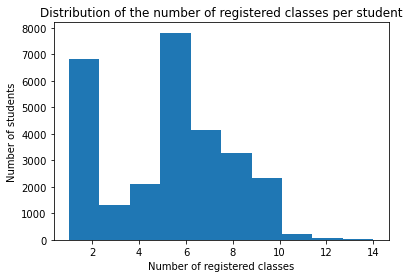

In [7]:
# plot the histogram of number of occurrences of each id in the big table
# this stands for the number of classes that individual is registered for
class_registrations.groupby(['employee_id_hash']).size().hist(grid=False)
plt.title('Distribution of the number of registered classes per student')
plt.xlabel('Number of registered classes')
plt.ylabel('Number of students')

In [25]:
class_registrations.groupby(['employee_id_hash']).size().value_counts()

1     5778
7     4136
6     4077
5     3744
8     3287
4     2090
9     1763
3     1318
2     1068
10     567
11     237
12      74
13      13
14       1
dtype: int64

In [ ]:
# THis distribution is weird. Why are there so many people with more than 7 registered classes? Should investigate further.

In [19]:
class_registrations.employee_id_hash.value_counts().loc[lambda x: x>5]

0x338FE5859DFD2A02FBAB27A282BACD03    14
0x0FC821182B0E728EA005B79090C6B320    13
0x207714DDAA2A69242C79AE457235C70F    13
0x21BCCD3173A3117F447A57FF0CC3A1CD    13
0xEBDC405D65A6CA8A34C98C53725062F5    13
                                      ..
0xD166A47DC622FA340B695F034FE0BD00     6
0xDEB9E083403D16EE1043FD84450DECE7     6
0xE8AD3794C4F7D9CA2CB9B1E9DC973FC9     6
0x0347AE648BF1BD2703D4F832F2473FB1     6
0x08EF4FD51A14E10222A0D6DDC5D618C9     6
Name: employee_id_hash, Length: 14155, dtype: int64

In [21]:
class_registrations[class_registrations['employee_id_hash'] == '0x338FE5859DFD2A02FBAB27A282BACD03']

,employee_id_hash,is_greek,is_athlete,academic_career,academic_plan1,subject,catalog_nbr,class_number,class_enroll_tot,class_section,student_infected,hd_notify_date
28421,0x338FE5859DFD2A02FBAB27A282BACD03,0,0,GM,MGMBA-MBA,NBA,6540.0,18474.0,50.0,4,0,NaN
28422,0x338FE5859DFD2A02FBAB27A282BACD03,0,0,GM,MGMBA-MBA,NBA,5060.0,13365.0,59.0,1,0,NaN
28423,0x338FE5859DFD2A02FBAB27A282BACD03,0,0,GM,MGMBA-MBA,NBA,6320.0,13469.0,48.0,1,0,NaN
28424,0x338FE5859DFD2A02FBAB27A282BACD03,0,0,GM,MGMBA-MBA,NBA,6290.0,19237.0,50.0,1,0,NaN
28425,0x338FE5859DFD2A02FBAB27A282BACD03,0,0,GM,MGMBA-MBA,NBA,6820.0,13556.0,39.0,4,0,NaN
28426,0x338FE5859DFD2A02FBAB27A282BACD03,0,0,GM,MGMBA-MBA,NMI,5040.0,13967.0,59.0,1,0,NaN
28427,0x338FE5859DFD2A02FBAB27A282BACD03,0,0,GM,MGMBA-MBA,PE,1480.0,8710.0,24.0,3,0,NaN
28428,0x338FE5859DFD2A02FBAB27A282BACD03,0,0,GM,MGMBA-MBA,NBA,5680.0,13409.0,20.0,4,0,NaN
28429,0x338FE5859DFD2A02FBAB27A282BACD03,0,0,GM,MGMBA-MBA,NBA,5682.0,13472.0,20.0,2,0,NaN
28430,0x338FE5859DFD2A02FBAB27A282BACD03,0,0,GM,MGMBA-MBA,NBA,6390.0,13527.0,55.0,1,0,NaN


In [17]:
class_registrations_students['is_greek'].value_counts()

0    25448
1     2705
Name: is_greek, dtype: int64

In [18]:
class_registrations_students['is_athlete'].value_counts()

0    27014
1     1139
Name: is_athlete, dtype: int64

In [16]:
# verify that the is_greek and is_athlete features are generated to be mutually exclusive
# i.e., is_athlete really stands for "is athlete but not in Greek life"
sum(class_registrations_students['is_greek'] + class_registrations_students['is_athlete']==2)

0